# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

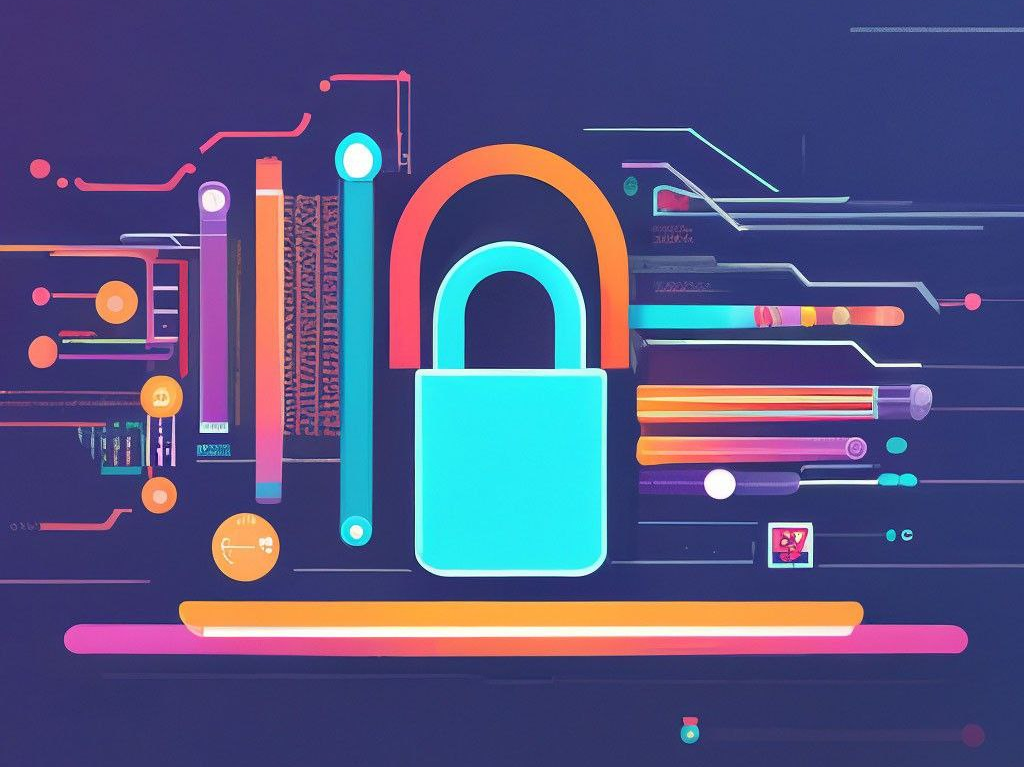

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка данных

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
try:
    df = pd.read_csv('C://datasets/insurance.csv')


except:
    df = pd.read_csv('/datasets/insurance.csv')

display(df)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.duplicated().sum()

153

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [6]:
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB


In [7]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


- в таблице данных компании соблюден почти идеальный баланс между мужчинами и женщинами;
- Средний возраст застрахованного составляет около 31 года, при этом медиана составляет 30;
- Границы возраста застрахованных приводят к выводу, что компания не занимается страхованием лиц, чей возраст составляет менее 18 и старше 65 лет;
- Также интересно взглянуть на уровень заработной платы застрахованных - медиана составляет чуть более 40 000 рублей. В целом, в компании скорее представлен средний экономический класс, чем слишком бедные или слишком богатые граждане. 

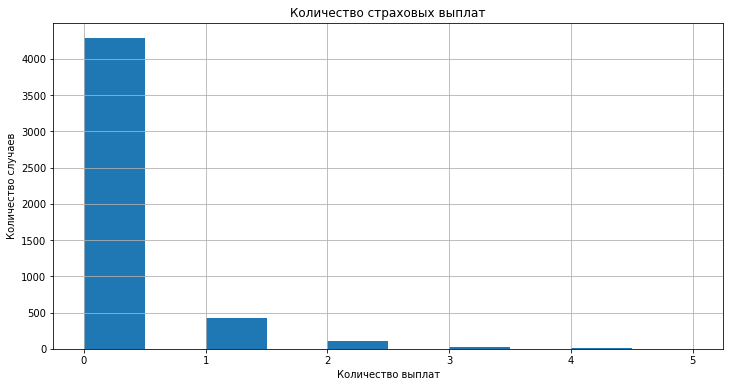

In [8]:
ax = df['Страховые выплаты'].hist(figsize = (12,6))
ax.set_title('Количество страховых выплат')
ax.set_xlabel('Количество выплат')
ax.set_ylabel('Количество случаев')
None

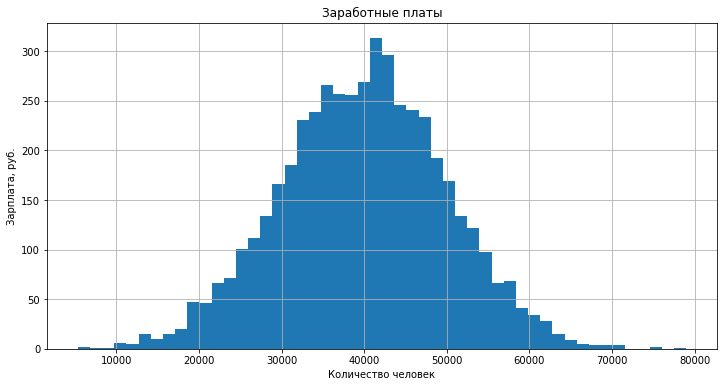

In [9]:
ax = df['Зарплата'].hist(bins = 50, figsize= (12,6))
ax.set_title('Заработные платы')
ax.set_xlabel('Количество человек')
ax.set_ylabel('Зарплата, руб.')
None

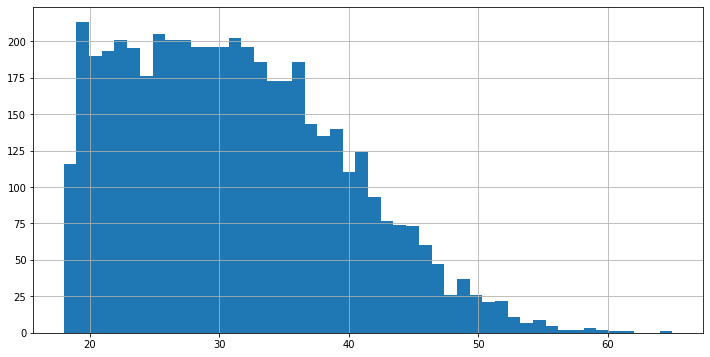

In [10]:
df['Возраст'].hist(bins = 48, figsize= (12,6))
ax.set_title('Возраст застрахованных')
ax.set_xlabel('Количество человек')
ax.set_ylabel('Возраст')
None

In [11]:
for i in df.columns:
    if i != 'Зарплата' and i != 'Возраст':
        print(i, df[i].unique())

Пол [1 0]
Члены семьи [1 0 2 4 3 5 6]
Страховые выплаты [0 1 2 3 5 4]


In [12]:
df.corr()['Страховые выплаты']

Пол                  0.011565
Возраст              0.654964
Зарплата            -0.013123
Члены семьи         -0.039303
Страховые выплаты    1.000000
Name: Страховые выплаты, dtype: float64

- Данные отличные, пропусков нет, ошибок не наблюдается, дубликаты удалили, типы подправили;
- Возраст и количество страховых выплат клиенту за последние 5 лет имеют корреляцию 0.651. Что выглядит логично: чем старше застрахованное лицо, тем более вероятно он потребует страховку чаще, следовательно, несёт в себе больше рисков для предприятия.

## Умножение матриц

    В этой части проекта мы учимся умножать матрицы.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

$$
X1 = X*P
$$
$$
w = (X^T X)^{-1} X^T y
$$
$$
w1 = (X1^T X1)^{-1} X1^T y
$$
$$
w1 = ((X*P)^T (X*P))^{-1} (X*P)^T y
$$

$$
w1 = ((P^T*X^T*X*P))^{-1} (X*P)^T y
$$
$$
w1 = ((P^T*X^T*X*P))^{-1} (X*P)^T y
$$


$$
w1 = (P^T*X^T*X*P)^{-1} (X*P)^T y
$$

    Воспользуемся формулами




$$
w1 = P^{-1} * (P^T*X^T*X)^{-1} * P^T * X^T y
$$
$$
w1 = P^{-1} * (X^T*X)^{-1} * (P^T)^{-1} * P^T * X^T y
$$
 
отсюда:
$$
w1 = P^{-1} * (X^T*X)^{-1} * E * X^T y
$$
$$
w1 = P^{-1} * (X^T*X)^{-1} * X^T y
$$
$$
w1 = P^{-1} * X^{-1} * (X^T)^{-1} * X^T y
$$
$$
w1 = P^{-1} * X^{-1} * E y
$$


$$
w1 = P^{-1} * X^{-1} y
$$
$$
w1 = (X*P)^{-1} y
$$
$$
w1 = (X1)^{-1} y
$$

При этом:

$$
w = (X^T X)^{-1} X^T y
$$
$$
w = X^{-1} * (X^T)^{-1} * X^T y
$$
$$
w = X^{-1} * E y
$$
$$
w = X^{-1} y
$$
При этом:
$$
w1 = (X1)^{-1} y
$$
Отсюда:
$$
w1 = P^{-1} * w
$$

Тогда:
$$
a1 = X1w1
$$
$$
a1 = X*P*P^{-1} * w = X*E* w = X*w = a
$$
$$
a1 = a
$$

Что и требовалось доказать.

## Алгоритм преобразования

**Алгоритм**

Возьмем случайную обратимую квадратную матрицу, чтоб она транспонировалась и умножалась во все стороны. Размерность возьмем, естественно, по количеству столбцов-признаков, потому что мы же будем признаки кодировать. 
<br/>
В задании сказано:
<br/>

<b>
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
    
Целевой признак: количество страховых выплат клиенту за последние 5 лет. </b> 

<br/>

Соответственно признаков 4, значит и матрицу берем 4 на 4.

## Проверка алгоритма

In [13]:
P = np.random.normal(size=(4, 4))
display(P)

array([[-0.42102001, -0.20956602,  0.67289434, -1.32271398],
       [-0.46686078, -0.31508107,  0.59488163,  1.54060306],
       [-0.13828807, -0.80168618,  0.20539597, -1.0105851 ],
       [ 0.88154037, -0.81539936, -1.47769968,  0.46931129]])

    Умножим полученную матрицу на обратную, чтобы получить единичную. 

In [14]:
(P*(P**(-1)))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

    Проверим обратимость матрицы с помощью np.linalg.pinv(P)

In [15]:
print(P @ np.linalg.pinv(P))

[[ 1.00000000e+00 -2.86036481e-15  1.09447964e-14 -4.44078233e-15]
 [-7.65613001e-15  1.00000000e+00  4.61409130e-15 -1.66037360e-15]
 [-2.47099164e-15 -2.80055255e-16  1.00000000e+00 -9.56703708e-16]
 [ 1.09688807e-14  2.19353042e-15 -9.14733607e-15  1.00000000e+00]]


- Матрица обратима;
- Закодируем наши признаки.

In [16]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [17]:
X = features.values
X1 = X@P

- Проверим, что раскодирование работает.

In [18]:
print("Раскодированные значения\n", X1@np.linalg.pinv(P))
print("\nИзначальные значения\n", features)
print('\nРазница до и после за пределами погрешности округления\n', features-X1@np.linalg.pinv(P)>0.0000001)

Раскодированные значения
 [[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-5.26150568e-11  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-4.31081231e-11  2.90000000e+01  2.10000000e+04 -1.87332797e-11]
 ...
 [-7.98167074e-11  2.00000000e+01  3.39000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.20000000e+01  3.27000000e+04  3.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  4.06000000e+04  1.00000000e+00]]

Изначальные значения
       Пол  Возраст  Зарплата  Члены семьи
0       1       41     49600            1
1       0       46     38000            1
2       0       29     21000            0
3       0       21     41700            2
4       1       28     26100            0
...   ...      ...       ...          ...
4995    0       28     35700            2
4996    0       34     52400            1
4997    0       20     33900            2
4998    1       22     32700            3
4999    1       28     40600            1

[4847 rows x 4 columns]

Разница до и 

- Наша задача - проверить, что метрика R2 одинакова на закодированных и некодированных данных;
- Необходимо переписать линейную регрессию функцией в матричном виде.

In [19]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = X.T.dot(X)
        w = np.linalg.inv(w)
        w = w.dot(X.T)
        w = w.dot(y)

        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(f'Метрика R2 на исходных данных = {r2_score(target, predictions):.3}')

Метрика R2 на исходных данных = 0.43


In [20]:
model.fit(X1, target)
predictions = model.predict(X1)
print(f'Метрика R2 на закодированных данных = {r2_score(target, predictions):.3}')

Метрика R2 на закодированных данных = 0.43


## Общий вывод

    В случае домножения матрицы признаков на случайную обратимую матрицу можно обеспечить защиту данных, не особо потеряв в качестве модели. (Незначительное отличие вызвано особенностью преобразования матриц и чисел с плавающей точкой, это норма)